In [ ]:
# Getting started

In [2]:
push!(LOAD_PATH, "../../../ExoJulia/")

3-element Array{ByteString,1}:
 "/Applications/Julia-0.4.5.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.5.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "../../../ExoJulia/"                                                                

In [ ]:
Pkg.add("LsqFit")

In [3]:
using ExoJulia
using PyPlot
using LsqFit

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [19]:
include("utils.jl")
include("orbital_utils.jl")
include("rv.jl")

agol_periodogram (generic function with 1 method)

### Read-in Mystery RV data

In [111]:
numbers = readdlm("mystery_planet.txt");

In [21]:
time = numbers[:,1];
rv = numbers[:,2];
err = numbers[:,end];

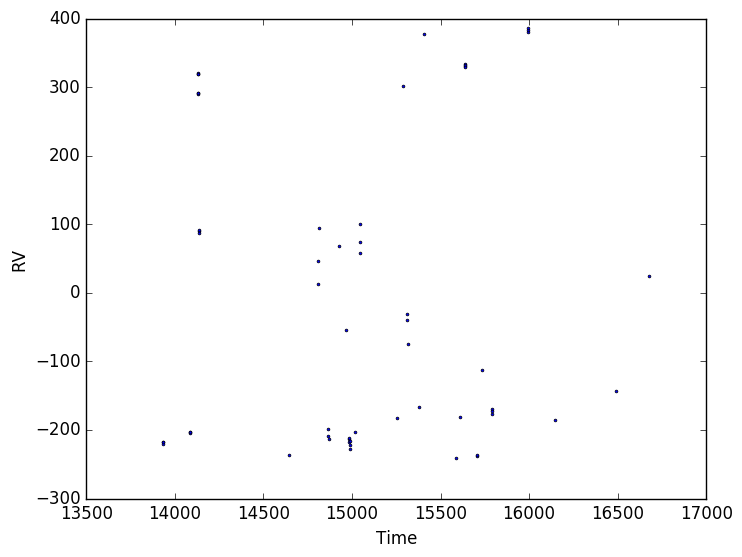

PyObject <matplotlib.text.Text object at 0x320b2ee90>

In [25]:
plot(time, rv, "o", ms=2.0)
xlabel("Time")
ylabel("RV")

## Period Fitting

### Agol Method

In [32]:
periods = linspace(1.0, 365.0, 1000)

linspace(1.0,365.0,1000)

In [33]:
p = collect(periods);

In [95]:
@time best_period = agol_periodogram(numbers, p)

116.50350350350351

0.009507 seconds (30.01 k allocations: 8.708 MB)


## RV Fitting

In [87]:
function func1(x, p)
    # p = [h,c,v0]
    p[1].*cos(x) .+ p[2].*sin(x) .+ p[3]
end

func1 (generic function with 1 method)

In [89]:
function func2(x, p)
    # p = [K, w, ecc, gamma]
    p[1] .* (cos(p[2] .+ x) + p[3] .* cos(p[2])) .+ p[4]
end

func2 (generic function with 1 method)

In [129]:
@time fit2 = curve_fit(func2, time, rv, 1.0./err.^2, [400.0, 0.0, 0.0, 0.0]);

  0.000958 seconds (2.14 k allocations: 472.594 KB)


In [91]:
@time fit1 = curve_fit(func1, time, rv, 1.0./err.^2, [100.0, 0.0, 0.0]);

  0.005164 seconds (4.46 k allocations: 520.467 KB)


In [92]:
fit1.param

3-element Array{Float64,1}:
  84.9046 
   4.27258
 -17.5333 

In [130]:
fit2.param

4-element Array{Float64,1}:
  85.012    
  -0.0502798
  -0.0500185
 -13.2865   

In [131]:
estimate_errors(fit2)

4-element Array{Float64,1}:
 71.974     
  0.815139  
  6.21635e9 
  5.27797e11

In [94]:
estimate_covar(fit1)

3x3 Array{Float64,2}:
 1785.15      90.3116  -61.2311
   90.3116  1679.58    189.417 
  -61.2311   189.417   874.461 

In [112]:
numbers[:,1] = mod(numbers[:,1] - numbers[1,1], best_period);

In [113]:
fastsortrows(numbers, [1]);

In [114]:
numbers

59x3 Array{Float64,2}:
   0.0      -217.7  1.0
   0.00068  -221.0  1.0
   0.0014   -217.8  1.0
  34.8409   -203.3  1.3
  34.8416   -204.2  1.3
  34.8423   -203.6  1.2
  79.797     321.0  1.1
  79.7976    318.4  1.1
  79.7983    319.2  1.1
  80.7911    290.6  1.2
  80.7918    291.0  1.2
  80.7925    291.7  1.1
  88.7764     90.7  1.2
   ⋮                   
  25.3589   -238.4  1.0
  26.3561   -237.0  1.2
  50.566    -113.1  1.3
 111.346    -177.0  1.3
 111.346    -170.0  1.3
 111.347    -172.8  1.2
  78.6431    379.9  1.3
  78.6455    382.7  1.4
  78.6487    386.1  1.5
 114.841    -185.9  1.2
 108.339    -142.7  1.1
  61.7846     24.3  1.4

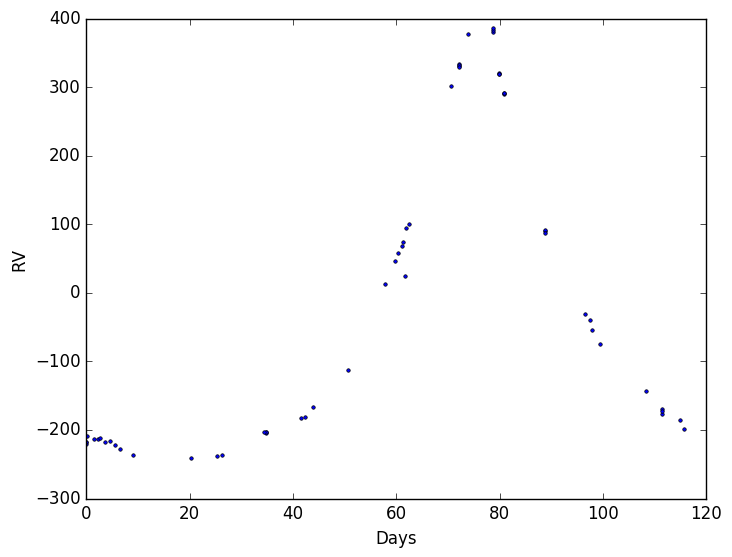

PyObject <matplotlib.text.Text object at 0x32c3b3b10>

In [117]:
plot(numbers[:,1], numbers[:,2], "o", ms=2.5)
xlabel("Days")
ylabel("RV")

In [123]:
M = zeros(length(time))
for i=1:length(time)
    M[i] = mean_anaomoly!(best_period, time[i], time[1])
end

In [124]:
function fit_to_physical()
    
end

59-element Array{Float64,1}:
   0.0       
   3.66733e-5
   7.55038e-5
   8.1622    
   8.16224   
   8.16228   
  10.5867    
  10.5868    
  10.5868    
  10.6404    
  10.6404    
  10.6404    
  11.071     
   ⋮         
  95.6154    
  95.6692    
  96.9749    
 100.253     
 100.253     
 100.253     
 111.055     
 111.056     
 111.056     
 119.291     
 137.79      
 147.845     